## Imports

In [1]:
import pandas as pd
import glob
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from keras import regularizers
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint


In [2]:
csv_files = glob.glob('data/21_solving-vehicle-routing-problem-and-its-variants-using-quantum-computing_d-qint23_qross-Datasets-Result-Data-Synthetic-TSP/Datasets/Result-Data/Synthetic-TSP/*.csv')

dfs = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file, header=0)  # header=0 means use the first line as header
    dfs.append(df)

result = pd.concat(dfs, ignore_index=True)

result.to_csv('combined.csv', index=False)

## Visualisation of the dataframe

In [3]:
result

,Relaxation Parameter A,Probability P_f,E_avg,E_std,E_min
0,4218.00,0.070312,66984.263871,4649.904420,53518.151014
1,4250.82,0.062500,66767.535234,4467.012351,54283.345921
2,4283.64,0.054688,67781.648134,4606.098256,56801.810406
3,4316.46,0.046875,67953.099510,4428.735985,57256.237944
4,4349.28,0.054688,67891.473254,4117.578820,57903.136557
...,...,...,...,...,...
8495,486.70,0.984375,5924.476759,523.608482,4500.360146
8496,489.36,1.000000,5970.642750,540.219575,4256.966468
8497,492.02,1.000000,5873.443450,495.450110,4645.787724
8498,494.68,1.000000,5979.712979,525.520594,4542.685017


## Data normalization

In [4]:
data = pd.read_csv('combined.csv')
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_normalized.to_csv('combined_normalized.csv', index=False)

In [5]:
data_normalized

,Relaxation Parameter A,Probability P_f,E_avg,E_std,E_min
0,0.423920,0.070312,0.534600,0.358130,0.521169
1,0.427218,0.062500,0.532871,0.344044,0.528620
2,0.430517,0.054688,0.540964,0.354756,0.553146
3,0.433815,0.046875,0.542333,0.341096,0.557571
4,0.437114,0.054688,0.541841,0.317131,0.563870
...,...,...,...,...,...
8495,0.048915,0.984375,0.047283,0.040328,0.043825
8496,0.049182,1.000000,0.047652,0.041607,0.041455
8497,0.049449,1.000000,0.046876,0.038159,0.045241
8498,0.049717,1.000000,0.047724,0.040475,0.044237


### Split the data into training and validation sets

In [6]:
train_data, val_data = train_test_split(data_normalized, test_size=0.2, random_state=42)

## Autoencoder model

In [7]:
input_layer = Input(shape=(data_normalized.shape[1],))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32 , activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_layer) # Add L1 regularization
encoded = Dense(32, activation='relu', name='encoded')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(data_normalized.shape[1], activation='sigmoid')(decoded)
autoencoder = Model(input_layer, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_2 (Dense)             (None, 32)                192       
                                                                 
 encoded (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 12325 (48.14 KB)
Trainable params: 12325 (48.14

## Training the autoencoder model

In [8]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

history = autoencoder.fit(data_normalized, data_normalized, epochs=1000, validation_split=0.2, verbose=0, callbacks=[checkpoint])


Epoch 1: val_loss improved from inf to 0.22058, saving model to best_model.h5


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.22058 to 0.21383, saving model to best_model.h5

Epoch 3: val_loss improved from 0.21383 to 0.21254, saving model to best_model.h5

Epoch 4: val_loss improved from 0.21254 to 0.21179, saving model to best_model.h5

Epoch 5: val_loss improved from 0.21179 to 0.21142, saving model to best_model.h5

Epoch 6: val_loss improved from 0.21142 to 0.21113, saving model to best_model.h5

Epoch 7: val_loss improved from 0.21113 to 0.21107, saving model to best_model.h5

Epoch 8: val_loss improved from 0.21107 to 0.21065, saving model to best_model.h5

Epoch 9: val_loss improved from 0.21065 to 0.21063, saving model to best_model.h5

Epoch 10: val_loss improved from 0.21063 to 0.21047, saving model to best_model.h5

Epoch 11: val_loss improved from 0.21047 to 0.21045, saving model to best_model.h5

Epoch 12: val_loss improved from 0.21045 to 0.21038, saving model to best_model.h5

Epoch 13: val_loss improved from 0.21038 to 0.21027, saving model to best_model.h5


## Plotting the loss

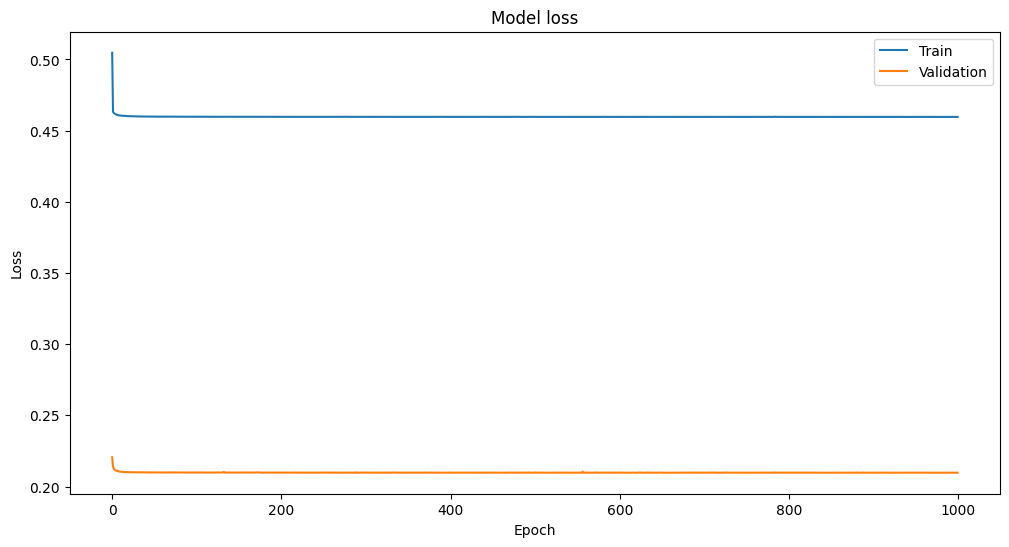

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Plotting Best vs Original model

54/54 [==============================] - 0s 2ms/step - loss: 0.4089


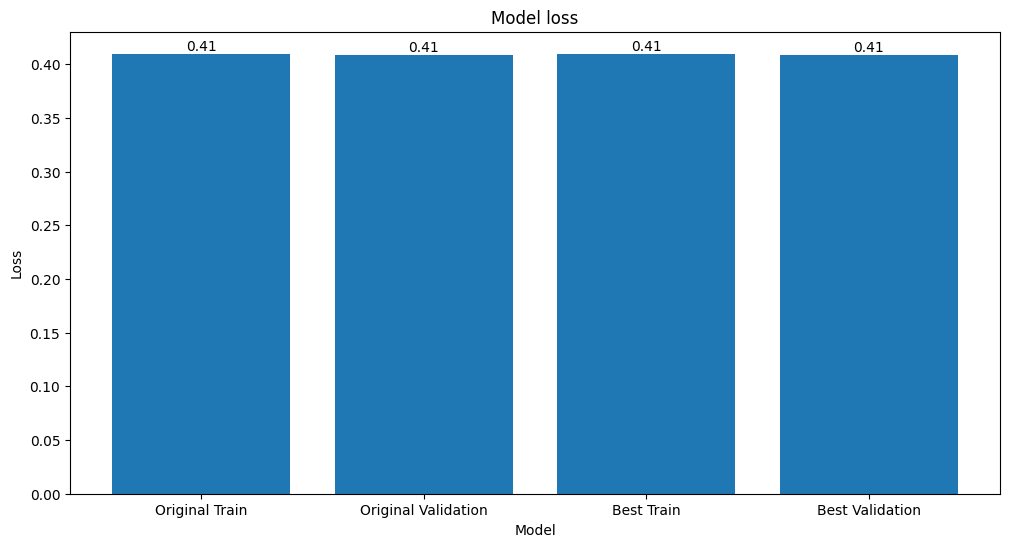

In [10]:
best_model = load_model('best_model.h5')

original_train_loss = autoencoder.evaluate(train_data, train_data)
original_val_loss = autoencoder.evaluate(val_data, val_data)
best_train_loss = best_model.evaluate(train_data, train_data)
best_val_loss = best_model.evaluate(val_data, val_data)

plt.figure(figsize=(12, 6))
bars = plt.bar(['Original Train', 'Original Validation', 'Best Train', 'Best Validation'], 
        [original_train_loss, original_val_loss, best_train_loss, best_val_loss])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Model')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

### loss of the model

In [11]:
saved_model = load_model('best_model.h5')

In [12]:
loss = saved_model.evaluate(data_normalized, data_normalized)
print('Loss:', loss)

266/266 [==============================] - 1s 2ms/step - loss: 0.4096
Loss: 0.4096236228942871


### Comparing the original data to the reconstructed data

In [13]:
data_reconstructed = saved_model.predict(data_normalized)

print('Original data:', data_normalized.iloc[0])
print('Reconstructed data:', data_reconstructed[0])

266/266 [==============================] - 1s 2ms/step
Original data: Relaxation Parameter A    0.423920
Probability P_f           0.070312
E_avg                     0.534600
E_std                     0.358130
E_min                     0.521169
Name: 0, dtype: float64
Reconstructed data: [0.41971374 0.07130141 0.53295165 0.3550555  0.5197912 ]


### Mean Squared Error (MSE)

Less the MSE, better the model.

In [14]:
original_data = data_normalized.values.flatten()
reconstructed_data = data_reconstructed.flatten()

mse = mean_squared_error(original_data, reconstructed_data)

print('MSE:', mse)

MSE: 3.96806524725664e-06


# Need to work on:
- for the loss func lets use mse. 
- use the tsp files as data. extract the features of the graph.